In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
!pip install numpy matplotlib
#from IPython.display import HTML
#HTML(ani.to_jshtml())


In [6]:
# Grid size and time step
nx, ny = 108, 108
dx = dy = 1.0
dt = 0.01

# Phase field parameters
kappa = 1.0       # Gradient energy coefficient
A = 1.0           # Free energy coefficient
epsilon = 1.0     # Interface width

# Simulation time
nsteps = 108

# Initialize field (random noise)
phi = np.random.rand(nx, ny)


In [7]:
def laplacian(f):
    return (np.roll(f, 1, axis=0) + np.roll(f, -1, axis=0) +
            np.roll(f, 1, axis=1) + np.roll(f, -1, axis=1) - 4*f) / (dx*dy)


In [8]:
def update_phi(phi):
    lap_phi = laplacian(phi)
    dfdphi = A * (phi**3 - phi)  # derivative of double-well potential
    return phi - dt * (dfdphi - kappa * lap_phi)


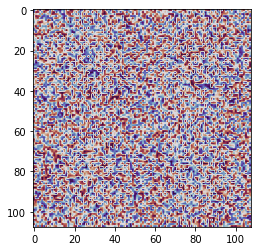

In [9]:
fig, ax = plt.subplots()
img = ax.imshow(phi, cmap='twilight_shifted', interpolation='hermite', animated=True)

def animate(i):
    global phi
    phi = update_phi(phi)
    img.set_array(phi)
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=nsteps, interval=30, blit=True)
plt.show()
#ani.save('phase_field_evolution.mp4', fps=30)
ani.save('phase_field_evolution.gif', writer='pillow', fps=30)



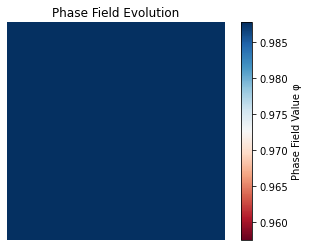

In [12]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()
img = ax.imshow(phi, cmap='RdBu', interpolation='quadric', animated=True)
cbar = fig.colorbar(img, ax=ax)
cbar.set_label('Phase Field Value φ')

# Set plot title and remove axes for cleaner view
ax.set_title('Phase Field Evolution')
ax.axis('off')

def animate(i):
    global phi
    phi = update_phi(phi)
    img.set_array(phi)
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=nsteps, interval=30, blit=True)

# Display animation inline (in Jupyter)
HTML(ani.to_jshtml())


## What You Observe in the Animation

#### Initial Frame:

The field φ(x, y) starts as random noise (values between 0 and 1).

Physically, this represents a uniform mixture of two phases with small fluctuations.

#### During Animation:
Regions of similar phase values start grouping together.

The system evolves to minimize total free energy by forming domains.

Interfaces between phases become smoother over time due to interfacial energy minimization.

#### Final Frames:
The system becomes biphasic: only two distinct regions (e.g., φ ≈ +1 and φ ≈ -1).

Interfaces between these two phases are thin and minimized in length.

The evolution slows down — this is called coarsening, where small domains shrink and larger ones grow.

### Colorbar Interpretation
The colorbar represents the values of the phase field variable φ.

Red areas → φ ≈ +1: One phase.

Blue areas → φ ≈ -1: Other phase.

White/light shades → transition zones (interface).

## Physical Meaning
This model mimics domain evolution in:

Metal alloys (phase separation).

Polymer blends.

Ferroelectric domains.

Grain growth (if extended further).

# Summary
### Aspect	Meaning
φ	Phase field (order parameter). φ=+1 and φ=–1 are two stable phases.
Red vs. Blue Domains	Different phases forming and separating.
Evolution Over Time	System minimizing energy: reducing interface area, coarsening domains.
Final State	Two pure phases with smooth boundaries and minimal interface energy.